# 1] PROBLEM STATEMENT

In [1]:
# 1.Check eligibility of the customer given the inputs described above.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

# READ THE DATA

In [3]:
df_train_d = pd.read_csv("training_set.csv")

In [4]:
df_train_d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Dropping columns having no statistical importance

In [6]:
drop_list=['Loan_ID']
df_train = df_train_d.drop('Loan_ID',axis=1)

In [7]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [9]:
df_train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# MISSING VALUES TREATMENT

In [10]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0],inplace=True)
df_train["Married"].fillna(df_train["Married"].mode()[0],inplace=True)
df_train["Dependents"].fillna(df_train["Dependents"].mode()[0],inplace=True)
df_train["Education"].fillna(df_train["Education"].mode()[0],inplace=True)
df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0],inplace=True)


df_train['ApplicantIncome'].fillna(df_train['ApplicantIncome'].median(),inplace=True)
df_train['CoapplicantIncome'].fillna(df_train['CoapplicantIncome'].median(),inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(),inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(),inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].median(),inplace=True)


In [11]:
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analaysis

In [12]:
# seperate categorical and continious columns

In [13]:
cat = []
con = []
for i in df_train.columns:
    if (df_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
df_train_con = con
df_train_con=df_train[con]
df_train_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,3806.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [15]:
df_train_cat = cat
df_train_cat=df_train[cat]
df_train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [16]:
y=df_train_cat[['Loan_Status']]
df_train_cat=df_train_cat.drop('Loan_Status',axis=1)
df_train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [17]:
y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [18]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

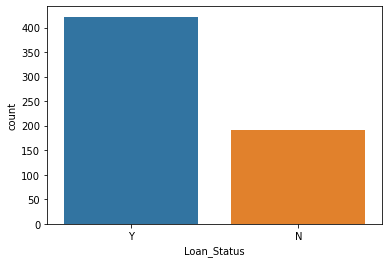

In [19]:
sns.countplot(df_train['Loan_Status'])

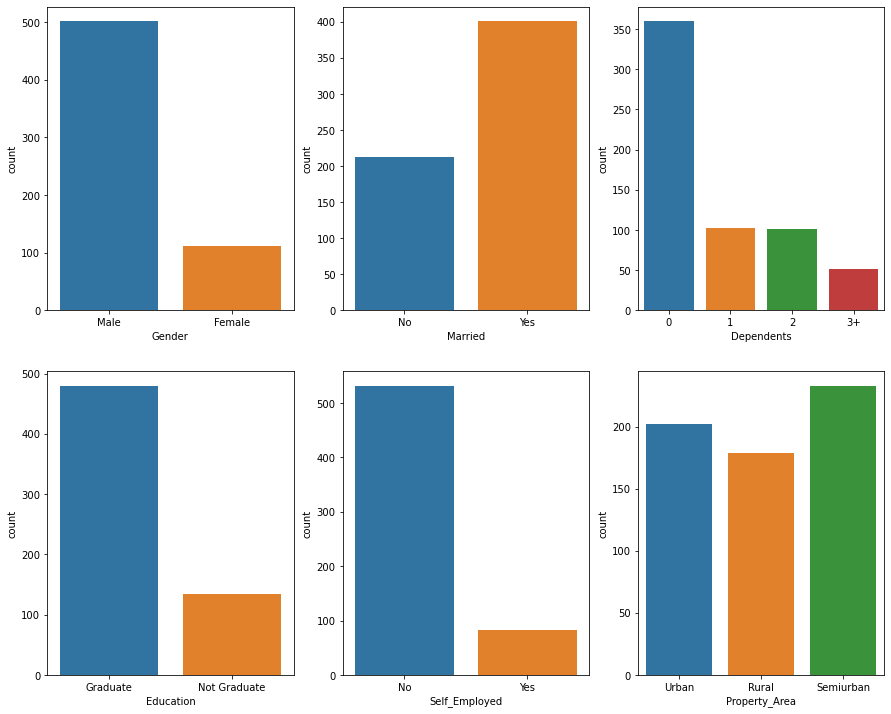

In [20]:
plt.figure(figsize=(15,19))
for x1, i in enumerate(df_train_cat.columns):
    if df_train_cat[i].dtypes=='object':
        plt.subplot(3,3,x1+1)
        sns.countplot(df_train_cat[i])

# Removing Outliers

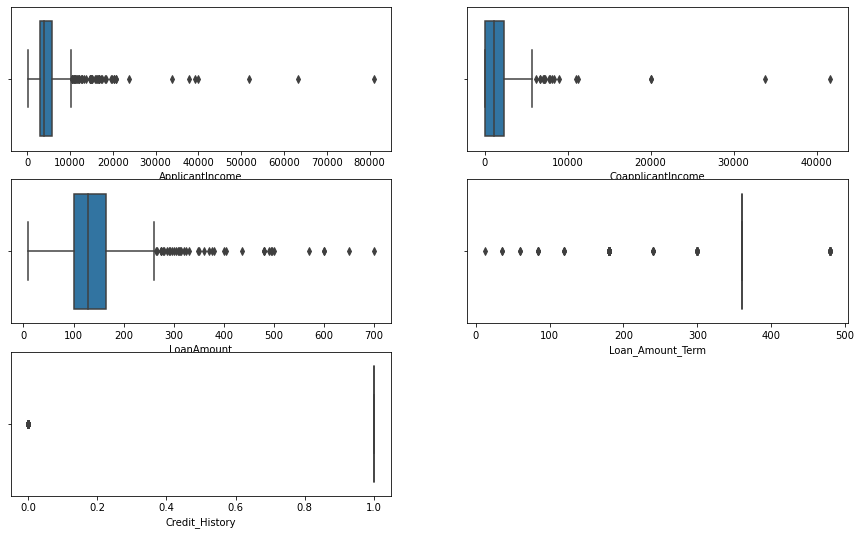

In [21]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_train_con.columns):
    if df_train_con[i].dtypes=='int64' or df_train_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_train_con[i])

In [22]:
for i in df_train_con.columns:
    q1 = df_train_con[i].quantile(0.25)
    q3 = df_train_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_train_con.loc[(df_train_con[i]>uppertail)|(df_train_con[i]<lowertail)]
    mean_1= df_train_con[i].mean()
    df_train_con.loc[(df_train_con[i]>uppertail)| (df_train_con[i]<lowertail),i]=mean_1

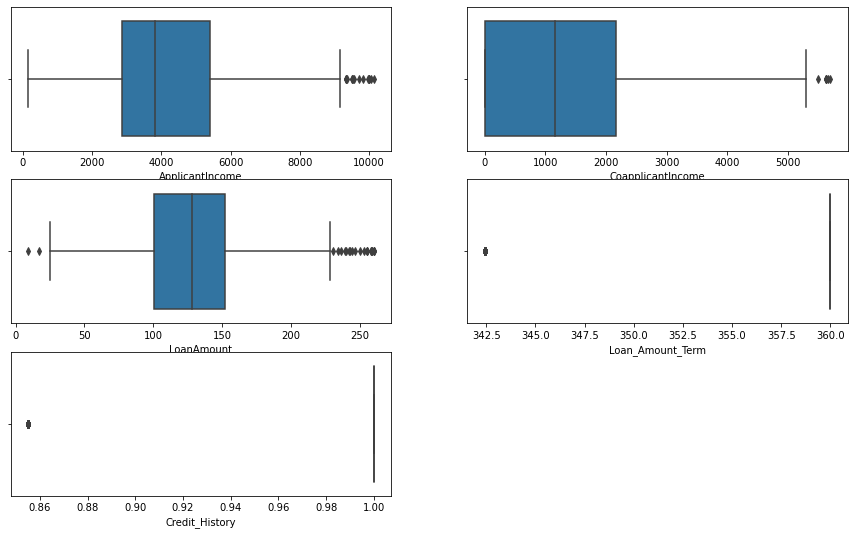

In [23]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_train_con.columns):
    if df_train_con[i].dtypes=='int64' or df_train_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_train_con[i])

# One Hot Encoding

In [24]:
df_dum_train = pd.get_dummies(df_train_cat)

In [25]:
df_dum_train

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# Standardization

In [26]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(df_train_con)

In [27]:
x = pd.DataFrame(std_scaler1,columns=df_train_con.columns)

In [28]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.864596,-0.901295,-0.036392,0.409024,0.411733
1,-0.223386,0.146030,-0.036392,0.409024,0.411733
2,-0.652614,-0.901295,-1.415086,0.409024,0.411733
3,-0.874684,0.736366,-0.214288,0.409024,0.411733
4,0.945009,-0.901295,0.252689,0.409024,0.411733


In [29]:
# Merging one hot encoding and Standardization

In [30]:
y1=y.replace({'Y':1,'N':0})
y1

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [31]:
df_train_merge = pd.concat([df_dum_train,x,y1],axis=1)
df_train_merge

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0.864596,-0.901295,-0.036392,0.409024,0.411733,1
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,-0.223386,0.146030,-0.036392,0.409024,0.411733,0
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,-0.652614,-0.901295,-1.415086,0.409024,0.411733,1
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,-0.874684,0.736366,-0.214288,0.409024,0.411733,1
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0.945009,-0.901295,0.252689,0.409024,0.411733,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,-0.705868,-0.901295,-1.303901,0.409024,0.411733,1
610,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,-0.063624,-0.901295,-1.993249,-2.444846,0.411733,1
611,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,2.048435,-0.734612,2.743233,0.409024,0.411733,1
612,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,1.788022,-0.901295,1.275591,0.409024,0.411733,1


# Checking Correlation with Independent columns and Loan Status

In [32]:
df_train_merge.corr()['Loan_Status']

Gender_Female             -0.017987
Gender_Male                0.017987
Married_No                -0.091478
Married_Yes                0.091478
Dependents_0              -0.003044
Dependents_1              -0.038740
Dependents_2               0.062384
Dependents_3+             -0.026123
Education_Graduate         0.085884
Education_Not Graduate    -0.085884
Self_Employed_No           0.003700
Self_Employed_Yes         -0.003700
Property_Area_Rural       -0.100694
Property_Area_Semiurban    0.136540
Property_Area_Urban       -0.043621
ApplicantIncome            0.011929
CoapplicantIncome          0.036851
LoanAmount                -0.029828
Loan_Amount_Term           0.054963
Credit_History             0.540556
Loan_Status                1.000000
Name: Loan_Status, dtype: float64

In [33]:
# dropping columns of linearity

In [34]:
noncorrelation = [column for column in df_train_merge if abs(df_train_merge[column].corr(df_train_merge["Loan_Status"]))<0.05]
corr_matrix = df_train_merge.drop(noncorrelation,axis=1)
corr_matrix.head()


,Married_No,Married_Yes,Dependents_2,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,0,0,0.409024,0.411733,1
1,0,1,0,1,0,1,0,0.409024,0.411733,0
2,0,1,0,1,0,0,0,0.409024,0.411733,1
3,0,1,0,0,1,0,0,0.409024,0.411733,1
4,1,0,0,1,0,0,0,0.409024,0.411733,1


In [35]:
l_c = corr_matrix.drop("Loan_Status",axis=1)


# Checking Multicolinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
vif['Features'] =l_c.columns
vif['VIF'] = [variance_inflation_factor(l_c.values,i) for i in range(l_c.shape[1])]
vif

,Features,VIF
0,Married_No,inf
1,Married_Yes,inf
2,Dependents_2,1.067284
3,Education_Graduate,inf
4,Education_Not Graduate,inf
5,Property_Area_Rural,1.357195
6,Property_Area_Semiurban,1.345755
7,Loan_Amount_Term,1.025161
8,Credit_History,1.009251


In [38]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)

['Married_No', 'Married_Yes', 'Education_Graduate', 'Education_Not Graduate']


In [39]:
df_train_final=l_c.drop(droplist,axis=1)
df_train_final

,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,Loan_Amount_Term,Credit_History
0,0,0,0,0.409024,0.411733
1,0,1,0,0.409024,0.411733
2,0,0,0,0.409024,0.411733
3,0,0,0,0.409024,0.411733
4,0,0,0,0.409024,0.411733
...,...,...,...,...,...
609,0,1,0,0.409024,0.411733
610,0,1,0,-2.444846,0.411733
611,0,0,0,0.409024,0.411733
612,1,0,0,0.409024,0.411733


In [40]:
df_train_final.shape

(614, 5)

In [41]:
columns_list=df_train_final.columns
columns_list


Index(['Dependents_2', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

# Model_Building

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(df_train_final,y1,test_size=0.25,random_state=31)

In [43]:
xtrain

,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,Loan_Amount_Term,Credit_History
103,0,0,1,0.409024,0.411733
546,0,0,1,-2.444846,0.411733
114,0,0,1,0.409024,0.411733
182,0,0,1,-2.444846,0.411733
160,0,0,1,0.409024,0.411733
...,...,...,...,...,...
252,0,1,0,0.409024,0.411733
28,0,0,0,0.409024,0.411733
610,0,1,0,-2.444846,0.411733
16,0,0,0,-2.444846,0.411733


In [44]:
xtest

,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,Loan_Amount_Term,Credit_History
7,0,0,1,0.409024,-2.428760
421,0,0,0,0.409024,-2.428760
301,0,0,1,0.409024,0.411733
266,1,0,1,0.409024,0.411733
377,0,0,1,0.409024,0.411733
...,...,...,...,...,...
202,0,0,0,-2.444846,0.411733
79,0,0,1,0.409024,0.411733
310,0,0,1,0.409024,0.411733
44,0,0,0,0.409024,0.411733


In [45]:
ytrain

,Loan_Status
103,1
546,0
114,1
182,1
160,1
...,...
252,1
28,0
610,1
16,1


In [46]:
ytest

,Loan_Status
7,0
421,0
301,1
266,1
377,1
...,...
202,0
79,1
310,1
44,1


# 1] Logistic Regression

# Model_Training

In [47]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

# Model_Evaluation

In [48]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytest,ypredtest)
print('Precision:',Precision)

Recall = recall_score(ytest,ypredtest)
print('Recall:',Recall)

F1score = f1_score(ytest,ypredtest)
print('F1score:',F1score)

Classification_report = classification_report(ytest,ypredtest)
print('Classification report:\n',Classification_report)

Accuracy: 0.8571428571428571
Confusion matrix: 
 [[ 20  22]
 [  0 112]]
Precision: 0.835820895522388
Recall: 1.0
F1score: 0.9105691056910569
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        42
           1       0.84      1.00      0.91       112

    accuracy                           0.86       154
   macro avg       0.92      0.74      0.78       154
weighted avg       0.88      0.86      0.84       154



In [49]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

F1score = f1_score(ytrain,ypredtrain)
print('F1score:',F1score)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.7934782608695652
Confusion matrix: 
 [[ 62  88]
 [  7 303]]
Precision: 0.7749360613810742
Recall: 0.9774193548387097
F1score: 0.8644793152639086
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.41      0.57       150
           1       0.77      0.98      0.86       310

    accuracy                           0.79       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.79      0.77       460



# 2]  KNN 

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(df_train_final,y1,test_size=0.25,random_state=31)

In [51]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [52]:
# Testing data evaluation
ypredtest = Knn_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix:\n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report:\n',Classification_report)

Accuracy: 0.7727272727272727
Confusion_matrix:
 [[32 10]
 [25 87]]
Classification_report:
               precision    recall  f1-score   support

           0       0.56      0.76      0.65        42
           1       0.90      0.78      0.83       112

    accuracy                           0.77       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.81      0.77      0.78       154



In [53]:
# Training data evaluation

ypredtrain = Knn_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

F1score = f1_score(ytrain,ypredtrain)
print('F1score:',F1score)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.691304347826087
Confusion matrix: 
 [[ 91  59]
 [ 83 227]]
Precision: 0.7937062937062938
Recall: 0.7322580645161291
F1score: 0.761744966442953
Classification report:
               precision    recall  f1-score   support

           0       0.52      0.61      0.56       150
           1       0.79      0.73      0.76       310

    accuracy                           0.69       460
   macro avg       0.66      0.67      0.66       460
weighted avg       0.71      0.69      0.70       460



# 3] Naive Bayes Algorithm

In [54]:
naive_model = BernoulliNB(binarize=True)
naive_model.fit(xtrain,ytrain)


BernoulliNB(binarize=True)

In [55]:
# Training data evaluation

ypredtrain = naive_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

F1score = f1_score(ytrain,ypredtrain)
print('F1score:',F1score)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.6739130434782609
Confusion matrix: 
 [[  0 150]
 [  0 310]]
Precision: 0.6739130434782609
Recall: 1.0
F1score: 0.8051948051948052
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.67      1.00      0.81       310

    accuracy                           0.67       460
   macro avg       0.34      0.50      0.40       460
weighted avg       0.45      0.67      0.54       460



In [56]:
# Testing data evaluation

ypredtest = naive_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytest,ypredtest)
print('Precision:',Precision)

Recall = recall_score(ytest,ypredtest)
print('Recall:',Recall)

F1score = f1_score(ytest,ypredtest)
print('F1score:',F1score)

Classification_report = classification_report(ytest,ypredtest)
print('Classification report:\n',Classification_report)

Accuracy: 0.7272727272727273
Confusion matrix: 
 [[  0  42]
 [  0 112]]
Precision: 0.7272727272727273
Recall: 1.0
F1score: 0.8421052631578948
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.73      1.00      0.84       112

    accuracy                           0.73       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.53      0.73      0.61       154



# 4] Decision Tree Classification

In [57]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [58]:
# Testing data evaluation

ypredtest = dt_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytest,ypredtest)
print('Precision:',Precision)

Recall = recall_score(ytest,ypredtest)
print('Recall:',Recall)

F1score = f1_score(ytest,ypredtest)
print('F1score:',F1score)

Classification_report = classification_report(ytest,ypredtest)
print('Classification report:\n',Classification_report)

Accuracy: 0.8571428571428571
Confusion matrix: 
 [[ 20  22]
 [  0 112]]
Precision: 0.835820895522388
Recall: 1.0
F1score: 0.9105691056910569
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        42
           1       0.84      1.00      0.91       112

    accuracy                           0.86       154
   macro avg       0.92      0.74      0.78       154
weighted avg       0.88      0.86      0.84       154



In [59]:
# Training data evaluation

ypredtrain = dt_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

F1score = f1_score(ytrain,ypredtrain)
print('F1score:',F1score)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.7934782608695652
Confusion matrix: 
 [[ 62  88]
 [  7 303]]
Precision: 0.7749360613810742
Recall: 0.9774193548387097
F1score: 0.8644793152639086
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.41      0.57       150
           1       0.77      0.98      0.86       310

    accuracy                           0.79       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.79      0.77       460



# 5] Random Forest Classification

In [60]:
rf_model = RandomForestClassifier(random_state=30) 
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [61]:
#  Testing data evaluation
ypredtest = rf_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.8571428571428571
Confusion_matrix: 
 [[ 20  22]
 [  0 112]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        42
           1       0.84      1.00      0.91       112

    accuracy                           0.86       154
   macro avg       0.92      0.74      0.78       154
weighted avg       0.88      0.86      0.84       154



In [62]:
# Training data evaluation
ypredtrain = rf_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.7934782608695652
Confusion_matrix: 
 [[ 62  88]
 [  7 303]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.41      0.57       150
           1       0.77      0.98      0.86       310

    accuracy                           0.79       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.79      0.77       460



# 6] SVM

In [63]:
svc_model = SVC()
svc_model.fit(xtrain,ytrain)

SVC()

In [64]:
# Testing data evaluation
ypredtest = svc_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.8571428571428571
Confusion_matrix: 
 [[ 20  22]
 [  0 112]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        42
           1       0.84      1.00      0.91       112

    accuracy                           0.86       154
   macro avg       0.92      0.74      0.78       154
weighted avg       0.88      0.86      0.84       154



In [65]:
# Training data evaluation
ypredtrain = svc_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.7934782608695652
Confusion_matrix: 
 [[ 62  88]
 [  7 303]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.41      0.57       150
           1       0.77      0.98      0.86       310

    accuracy                           0.79       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.79      0.77       460



In [66]:
# Best model is Logistic Classification

# Reading The Testing Data

In [67]:
df_test_i = pd.read_csv("testing_set.csv")

In [68]:
df_test_i.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
df_test_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [70]:
id=df_test_i[['Loan_ID']]

In [71]:
# dropping columns having no statistical importance

In [72]:
drop_list=['Loan_ID']
df_test = df_test_i.drop('Loan_ID',axis=1)

In [73]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Missing Values Treatment

In [74]:
df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace=True)
df_test["Dependents"].fillna(df_test["Dependents"].mode()[0],inplace=True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace=True)


df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(),inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].median(),inplace=True)


In [76]:
df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analaysis

In [77]:
# seperate categorical and continious columns

In [78]:
cat = []
con = []
for i in df_test.columns:
    if (df_test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [79]:
df_test_cat = cat
df_test_cat=df_test[cat]
df_test_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [80]:
df_test_con = con
df_test_con=df_test[con]
df_test_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


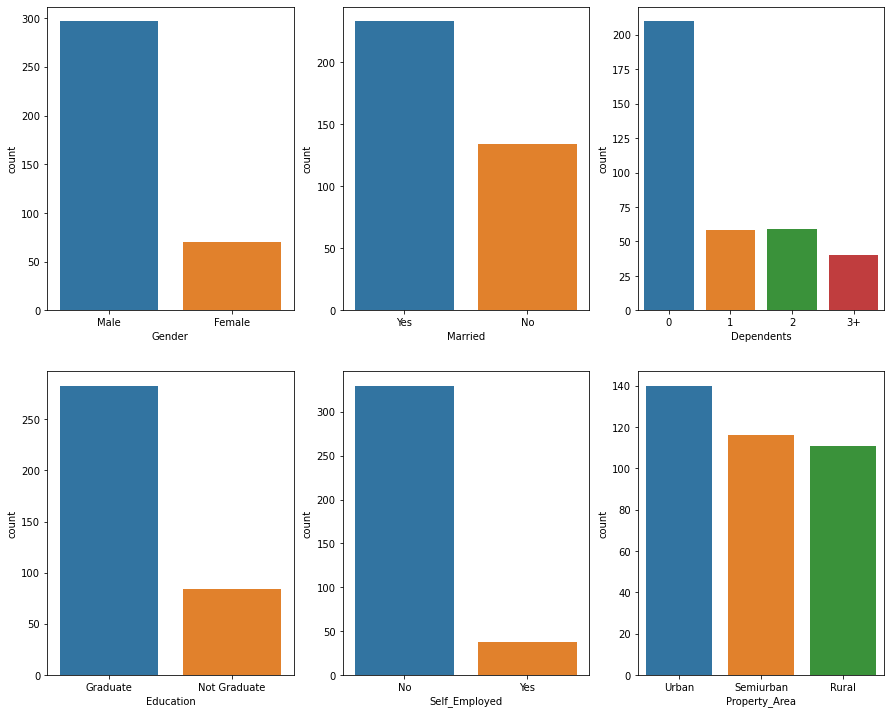

In [81]:
plt.figure(figsize=(15,19))
for x1, i in enumerate(df_test_cat.columns):
    if df_test_cat[i].dtypes=='object':
        plt.subplot(3,3,x1+1)
        sns.countplot(df_test_cat[i])

# Removing Outliers

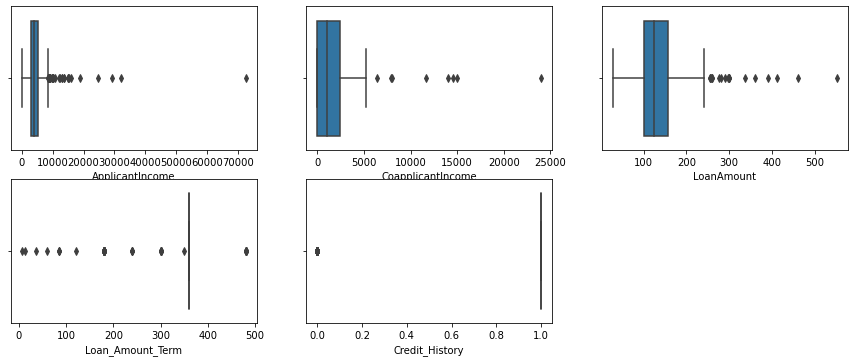

In [82]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_test_con.columns):
    if df_test_con[i].dtypes=='int64' or df_test_con[i].dtypes=='float64':
        plt.subplot(3,3,x1+1)
        sns.boxplot(df_test_con[i])

In [83]:
for i in df_test_con.columns:
    q1 = df_test_con[i].quantile(0.25)
    q3 = df_test_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_test_con.loc[(df_test_con[i]>uppertail)|(df_test_con[i]<lowertail)]
    mean_1= df_test_con[i].mean()
    df_test_con.loc[(df_test_con[i]>uppertail)| (df_test_con[i]<lowertail),i]=mean_1

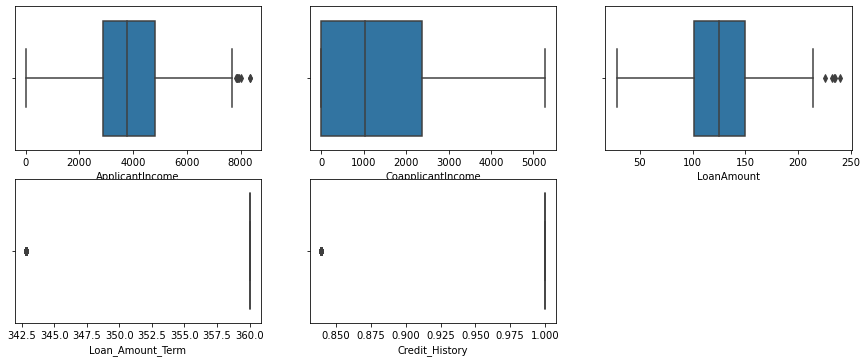

In [84]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_test_con.columns):
    if df_test_con[i].dtypes=='int64' or df_test_con[i].dtypes=='float64':
        plt.subplot(3,3,x1+1)
        sns.boxplot(df_test_con[i])

# ONE HOT ENCODING

In [85]:
df_dum_test = pd.get_dummies(df_test_cat)

In [86]:
df_dum_test

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# Standardization

In [87]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(df_test_con)

In [88]:
x1 = pd.DataFrame(std_scaler1,columns=df_test_con.columns)

In [89]:
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.193167,-0.921930,-0.422209,0.397151,0.437674
1,-0.568828,0.119985,-0.018800,0.397151,0.437674
2,0.713350,0.328367,2.048668,0.397151,0.437674
3,-1.059308,0.846546,-0.674339,0.397151,0.437674
4,-0.435546,-0.921930,-1.229026,0.397151,0.437674
...,...,...,...,...,...
362,0.052935,0.312391,-0.346570,0.397151,0.437674
363,0.152231,-0.429452,-0.296144,0.397151,0.437674
364,-0.452872,0.462427,-0.018800,0.397151,0.437674
365,0.713350,0.740271,0.788017,0.397151,0.437674


In [90]:
# Merging One Hot Encoding and Standardization

In [91]:
df_test_merge = pd.concat([id,df_dum_test,x1],axis=1)
df_test_merge

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,0,1,0,1,1,0,0,0,1,...,1,0,0,0,1,1.193167,-0.921930,-0.422209,0.397151,0.437674
1,LP001022,0,1,0,1,0,1,0,0,1,...,1,0,0,0,1,-0.568828,0.119985,-0.018800,0.397151,0.437674
2,LP001031,0,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0.713350,0.328367,2.048668,0.397151,0.437674
3,LP001035,0,1,0,1,0,0,1,0,1,...,1,0,0,0,1,-1.059308,0.846546,-0.674339,0.397151,0.437674
4,LP001051,0,1,1,0,1,0,0,0,0,...,1,0,0,0,1,-0.435546,-0.921930,-1.229026,0.397151,0.437674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0.052935,0.312391,-0.346570,0.397151,0.437674
363,LP002975,0,1,0,1,1,0,0,0,1,...,1,0,0,0,1,0.152231,-0.429452,-0.296144,0.397151,0.437674
364,LP002980,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,-0.452872,0.462427,-0.018800,0.397151,0.437674
365,LP002986,0,1,0,1,1,0,0,0,1,...,1,0,1,0,0,0.713350,0.740271,0.788017,0.397151,0.437674


In [92]:
df_test_merge.shape

(367, 21)

In [93]:
df_fin = df_test_merge[columns_list]
df_fin

,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,Loan_Amount_Term,Credit_History
0,0,0,0,0.397151,0.437674
1,0,0,0,0.397151,0.437674
2,1,0,0,0.397151,0.437674
3,1,0,0,0.397151,0.437674
4,0,0,0,0.397151,0.437674
...,...,...,...,...,...
362,0,0,0,0.397151,0.437674
363,0,0,0,0.397151,0.437674
364,0,0,1,0.397151,0.437674
365,0,1,0,0.397151,0.437674


# Final_Prediction

In [94]:
Prediction = dt_model.predict(df_fin)
Prediction_test= pd.DataFrame(Prediction)

In [95]:
T1=Prediction_test.replace({1:'Y',0:'N'})
T1

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [96]:
Final_out =pd.DataFrame()
Final_out[['Loan_ID']]=id
Final_out[['Loan_Status']] = T1

In [97]:
Final_out

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2] Problem Statement

In [98]:
# Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

# Import Libraries

In [99]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [100]:
df_train_i = pd.read_csv('training_set.csv')

In [101]:
df_train_i.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
df_train_i.shape

(614, 13)

In [103]:
# Dropping columns having no statistical importance

In [104]:
df_train1 = df_train_i.drop(['Loan_ID'],axis=1)
df_train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


# Missing Values Treatment

In [106]:
df_train1.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
df_train1["Gender"].fillna(df_train1["Gender"].mode()[0],inplace=True)
df_train1["Married"].fillna(df_train1["Married"].mode()[0],inplace=True)
df_train1["Dependents"].fillna(df_train1["Dependents"].mode()[0],inplace=True)
df_train1["Education"].fillna(df_train1["Education"].mode()[0],inplace=True)
df_train1["Self_Employed"].fillna(df_train1["Self_Employed"].mode()[0],inplace=True)


df_train1['ApplicantIncome'].fillna(df_train1['ApplicantIncome'].median(),inplace=True)
df_train1['CoapplicantIncome'].fillna(df_train1['CoapplicantIncome'].median(),inplace=True)
df_train1['LoanAmount'].fillna(df_train1['LoanAmount'].median(),inplace=True)
df_train1['Loan_Amount_Term'].fillna(df_train1['Loan_Amount_Term'].median(),inplace=True)
df_train1['Credit_History'].fillna(df_train1['Credit_History'].median(),inplace=True)


In [108]:
df_train1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
# seperate categorical and continious columns

In [110]:
# drop_list=['Loan_Status']
df_train_l = df_train1.drop('Loan_Status',axis=1)

In [111]:
cat = []
con = []
for i in df_train_l.columns:
    if (df_train_l[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [112]:
df_train_con1 = con
df_train_con1=df_train1[con]
df_train_con1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,3806.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [113]:
df_train_cat1 = cat
df_train_cat1=df_train1[cat]
df_train_cat1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


# Exploratory Data Analysis

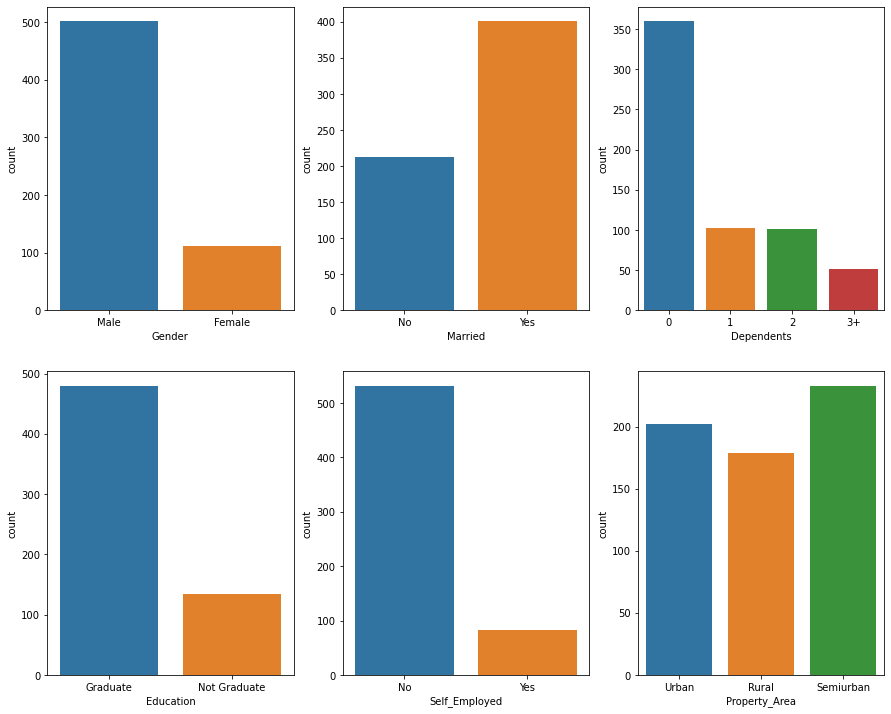

In [114]:
plt.figure(figsize=(15,19))
for x1, i in enumerate(df_train_cat1.columns):
    if df_train_cat1[i].dtypes=='object':
        plt.subplot(3,3,x1+1)
        sns.countplot(df_train_cat1[i])

# Removing Outliers

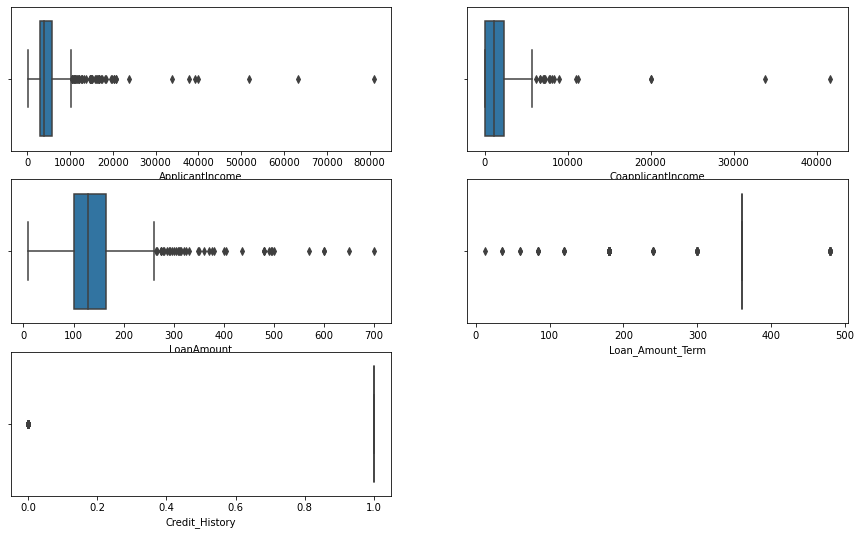

In [115]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_train_con1.columns):
    if df_train_con1[i].dtypes=='int64' or df_train_con1[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_train_con1[i])

In [116]:
for i in df_train_con1.columns:
    q1 = df_train_con1[i].quantile(0.25)
    q3 = df_train_con1[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_train_con1.loc[(df_train_con[i]>uppertail)|(df_train_con1[i]<lowertail)]
    mean_1= df_train_con1[i].mean()
    df_train_con1.loc[(df_train_con[i]>uppertail)| (df_train_con1[i]<lowertail),i]=mean_1

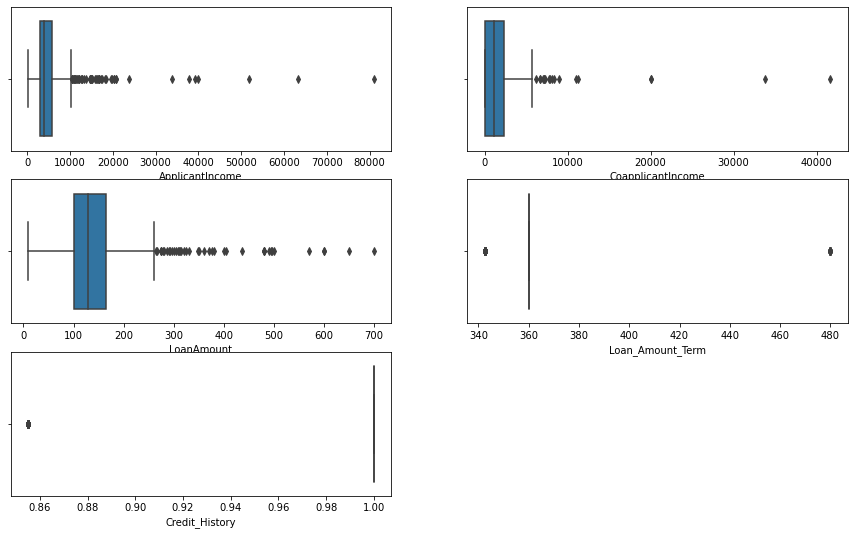

In [117]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_train_con1.columns):
    if df_train_con1[i].dtypes=='int64' or df_train_con1[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_train_con1[i])

In [118]:
# drop_list=['Loan_Status']
df_train_l = df_train1.drop('Loan_Status',axis=1)

# ONE HOT ENCODING

In [119]:
df_dum_train1 = pd.get_dummies(df_train_cat1)

In [120]:
df_dum_train1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# Standaridization

In [121]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(df_train_con1)
x_std1 = pd.DataFrame(array,columns=df_train_con1.columns)
x_std1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.073497,-0.554104,-0.211241,-0.042668,0.411733
1,-0.261168,-0.038356,-0.211241,-0.042668,0.411733
2,-0.393199,-0.554104,-0.948996,-0.042668,0.411733
3,-0.461507,0.252351,-0.306435,-0.042668,0.411733
4,0.098232,-0.554104,-0.056551,-0.042668,0.411733
...,...,...,...,...,...
609,-0.409580,-0.554104,-0.889500,-0.042668,0.411733
610,-0.212024,-0.554104,-1.258378,-0.935793,0.411733
611,0.437647,-0.472022,1.276168,-0.042668,0.411733
612,0.357543,-0.554104,0.490816,-0.042668,0.411733


# Merging one hot encoding and Standardization

In [122]:
df_train_merge1 = pd.concat([df_dum_train1,x_std1],axis=1)
df_train_merge1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.073497,-0.554104,-0.211241,-0.042668,0.411733
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,-0.261168,-0.038356,-0.211241,-0.042668,0.411733
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.393199,-0.554104,-0.948996,-0.042668,0.411733
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,-0.461507,0.252351,-0.306435,-0.042668,0.411733
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.098232,-0.554104,-0.056551,-0.042668,0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.409580,-0.554104,-0.889500,-0.042668,0.411733
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,-0.212024,-0.554104,-1.258378,-0.935793,0.411733
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0.437647,-0.472022,1.276168,-0.042668,0.411733
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.357543,-0.554104,0.490816,-0.042668,0.411733


# Model_Building

In [123]:
kmeans_model = KMeans(n_clusters=5)  # n_clusters=8  >> default
kmeans_model.fit(x_std1)

KMeans(n_clusters=5)

# With Cluster Sum of Squares[WCSS]

In [124]:
kmeans_model.inertia_

1053.8526211581504

# Labeling Variable

In [125]:
A_var = kmeans_model.fit_predict(x_std1)
A_var

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 1,
       1, 4, 1, 0, 2, 1, 1, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2,

In [126]:
# Cluster_0 points

In [127]:
index_0 = np.where(A_var==0)
index_0

(array([ 75, 109, 130, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500,
        516, 573], dtype=int64),)

In [128]:
cluster_0 = df_train_merge1.iloc[index_0]
cluster_0

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
75,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,-0.270341,-0.554104,-0.389730,6.05043,0.411733
109,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,-0.545378,-0.296230,-0.615817,6.05043,0.411733
130,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,2.418767,-0.554104,6.000182,6.05043,0.411733
168,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.518186,-0.554104,-0.984694,6.05043,-2.428760
179,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.502460,-0.057851,-0.520622,6.05043,-2.428760
228,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,-0.105220,-0.554104,0.145737,6.05043,0.411733
248,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,-0.412528,0.076217,-0.270738,6.05043,0.411733
293,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0.002731,-0.554104,-0.032752,6.05043,-2.428760
298,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.065578,0.314938,0.062442,6.05043,0.411733
358,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,-0.393199,0.015681,-0.544421,6.05043,-2.428760


In [129]:
# clustering--.1

In [130]:
index_1 = np.where(A_var==1)
index_1

(array([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,  12,  13,  14,
         15,  16,  18,  19,  21,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  49,  50,  51,  52,  53,  55,  56,  57,  58,  59,  60,  61,
         65,  67,  68,  70,  71,  72,  74,  76,  77,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 110,
        111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125,
        127, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157,
        158, 159, 160, 161, 163, 164, 165, 166, 167, 169, 170, 172, 173,
        174, 175, 176, 178, 181, 182, 184, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 212, 213, 214, 215, 216

In [131]:
cluster_1 =df_train_merge1.iloc[index_1]
cluster_1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.073497,-0.554104,-0.211241,-0.042668,0.411733
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,-0.261168,-0.038356,-0.211241,-0.042668,0.411733
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.393199,-0.554104,-0.948996,-0.042668,0.411733
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,-0.461507,0.252351,-0.306435,-0.042668,0.411733
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.098232,-0.554104,-0.056551,-0.042668,0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,-0.355195,0.112811,-0.449227,-0.042668,0.411733
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.409580,-0.554104,-0.889500,-0.042668,0.411733
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,-0.212024,-0.554104,-1.258378,-0.935793,0.411733
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0.437647,-0.472022,1.276168,-0.042668,0.411733


In [132]:
# clustering_2 

In [133]:
index_2 = np.where(A_var==2)
index_2

(array([  7,  17,  20,  22,  23,  36,  48,  54,  62,  63,  64,  66,  69,
         73,  78, 108, 112, 122, 128, 138, 150, 162, 180, 186, 201, 211,
        218, 220, 250, 254, 256, 267, 280, 291, 300, 307, 325, 326, 338,
        346, 353, 367, 373, 387, 396, 399, 400, 408, 412, 414, 421, 423,
        431, 438, 448, 450, 452, 453, 464, 466, 471, 477, 486, 494, 499,
        517, 527, 532, 541, 548, 550, 553, 554, 564, 567, 569, 571, 576,
        584, 589, 597, 613], dtype=int64),)

In [134]:
cluster_2 =df_train_merge1.iloc[index_2]
cluster_2

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
7,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,-0.387301,0.302284,0.145737,-0.042668,-2.42876
17,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,-0.309655,-0.554104,-0.830004,-0.042668,-2.42876
20,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0.370157,-0.554104,-0.496824,-0.042668,-2.42876
22,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,-0.458723,0.099473,-0.354033,-0.042668,-2.42876
23,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,-0.333408,0.101525,-0.401630,-0.042668,-2.42876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,-0.378947,0.201734,-0.116047,-0.042668,-2.42876
584,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,-0.428090,0.101525,0.002946,-0.042668,-2.42876
589,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,-0.438083,-0.554104,-0.473025,-0.042668,-2.42876
597,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.395328,-0.554104,-0.687212,-0.042668,-2.42876


In [135]:
# clustering--3

In [136]:
index_3 = np.where(A_var==3)
index_3

(array([402, 417, 581, 600], dtype=int64),)

In [137]:
cluster_3 =df_train_merge1.iloc[index_3]
cluster_3

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
402,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.475104,6.286055,-0.508723,-0.042668,0.411733
417,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,-0.622533,6.286055,1.109579,-0.042668,0.411733
581,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,-0.583874,11.018420,-0.663414,-0.042668,0.411733
600,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,-0.816484,13.696342,2.430398,-0.935793,0.411733


In [138]:
# clustering--4

In [139]:
index_4 = np.where(A_var==4)
index_4

(array([  9,  34, 126, 155, 171, 177, 183, 185, 258, 278, 308, 324, 333,
        369, 372, 409, 432, 443, 487, 506, 523, 525, 561, 572, 594, 604],
       dtype=int64),)

In [140]:
cluster_4 =df_train_merge1.iloc[index_4]
cluster_4

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
9,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1.218857,3.197039,2.418499,-0.042668,0.411733
34,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1.162998,0.471920,2.073420,-0.042668,0.411733
126,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,3.014544,-0.554104,2.668384,-0.042668,0.411733
155,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,5.667613,-0.554104,5.405218,-0.935793,-2.428760
171,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,7.594676,-0.554104,6.595146,-0.935793,0.411733
177,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0.018948,3.310586,4.155794,-0.042668,-2.428760
183,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,4.659689,-0.554104,1.359463,-0.042668,0.411733
185,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,5.528047,1.070434,-0.306435,-0.042668,0.411733
258,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1.520596,0.164113,1.883032,-0.042668,0.411733
278,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1.504214,-0.554104,3.453736,-0.042668,0.411733


In [141]:
WCSS_list = []
for k in range(1,10):
    kmeans_model = KMeans(n_clusters=k)  
    kmeans_model.fit(x_std1)
    WCSS = kmeans_model.inertia_
    WCSS_list.append(WCSS)
    print('K >>',k,'WCSS>>',WCSS)

K >> 1 WCSS>> 3069.9999999999986
K >> 2 WCSS>> 2454.6522073290093
K >> 3 WCSS>> 1914.9361305235138
K >> 4 WCSS>> 1402.2594800878387
K >> 5 WCSS>> 1053.8526211581504
K >> 6 WCSS>> 842.8771480588024
K >> 7 WCSS>> 728.9873712962429
K >> 8 WCSS>> 638.9985676743489
K >> 9 WCSS>> 577.3833332865016


In [142]:
WCSS

577.3833332865016

In [143]:
WCSS_list

[3069.9999999999986,
 2454.6522073290093,
 1914.9361305235138,
 1402.2594800878387,
 1053.8526211581504,
 842.8771480588024,
 728.9873712962429,
 638.9985676743489,
 577.3833332865016]

Text(0.5, 1.0, 'Elbow method graph')

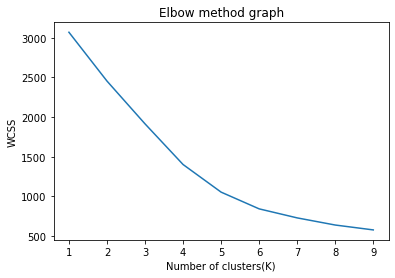

In [144]:
k = range(1,10)
plt.plot(k,WCSS_list)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow method graph')

In [145]:
# predicted k=5

In [146]:
kmeans_model = KMeans(n_clusters=5) 
kmeans_model.fit(x_std1)

KMeans(n_clusters=5)

In [147]:
index_1 = np.where(A_var==1)
index_1

(array([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,  12,  13,  14,
         15,  16,  18,  19,  21,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  49,  50,  51,  52,  53,  55,  56,  57,  58,  59,  60,  61,
         65,  67,  68,  70,  71,  72,  74,  76,  77,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 110,
        111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125,
        127, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 156, 157,
        158, 159, 160, 161, 163, 164, 165, 166, 167, 169, 170, 172, 173,
        174, 175, 176, 178, 181, 182, 184, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 212, 213, 214, 215, 216

In [148]:
cluster_1 =df_train_merge1.iloc[index_1]
cluster_1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.073497,-0.554104,-0.211241,-0.042668,0.411733
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,-0.261168,-0.038356,-0.211241,-0.042668,0.411733
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.393199,-0.554104,-0.948996,-0.042668,0.411733
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,-0.461507,0.252351,-0.306435,-0.042668,0.411733
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.098232,-0.554104,-0.056551,-0.042668,0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,-0.355195,0.112811,-0.449227,-0.042668,0.411733
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.409580,-0.554104,-0.889500,-0.042668,0.411733
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,-0.212024,-0.554104,-1.258378,-0.935793,0.411733
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0.437647,-0.472022,1.276168,-0.042668,0.411733


In [149]:
kmeans_model = KMeans(n_clusters=5)  # n_clusters=8  >> default
y_pred_train1=kmeans_model.fit_predict(x_std1)

In [150]:
y_pred_train1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 1,

In [151]:
# Visualizing the cluster

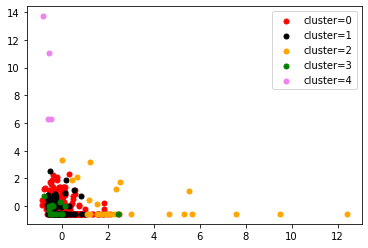

In [152]:
plt.scatter(x_std1.iloc[y_pred_train1==0,0],x_std1.iloc[y_pred_train1==0,1],s=25,c='red',label="cluster=0")
plt.scatter(x_std1.iloc[y_pred_train1==1,0],x_std1.iloc[y_pred_train1==1,1],s=25,c='black',label="cluster=1")
plt.scatter(x_std1.iloc[y_pred_train1==2,0],x_std1.iloc[y_pred_train1==2,1],s=25,c='orange',label="cluster=2")
plt.scatter(x_std1.iloc[y_pred_train1==3,0],x_std1.iloc[y_pred_train1==3,1],s=25,c='green',label="cluster=3")
plt.scatter(x_std1.iloc[y_pred_train1==4,0],x_std1.iloc[y_pred_train1==4,1],s=25,c='violet',label="cluster=4")
plt.legend()
plt.show()

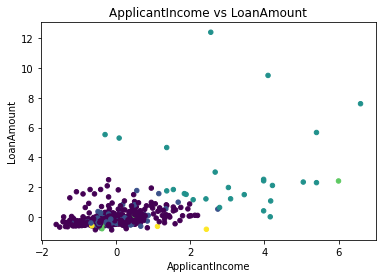

In [153]:
plt.scatter(df_train_merge1['LoanAmount'],df_train_merge1['ApplicantIncome'],c=y_pred_train1,s=20)
plt.title("ApplicantIncome vs LoanAmount")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

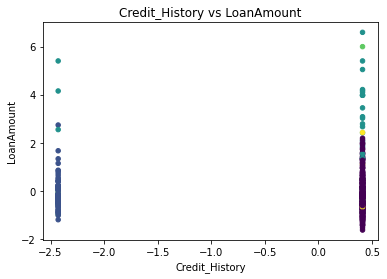

In [154]:
plt.scatter(df_train_merge1['Credit_History'],df_train_merge1['LoanAmount'],s=20,c=y_pred_train1)
plt.title("Credit_History vs LoanAmount")
plt.xlabel("Credit_History")
plt.ylabel("LoanAmount")
plt.show()

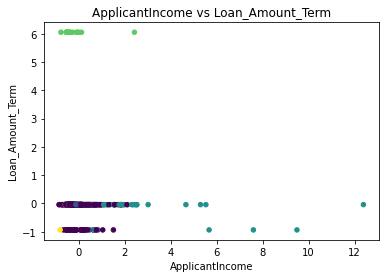

In [155]:
plt.scatter(df_train_merge1['ApplicantIncome'],df_train_merge1['Loan_Amount_Term'],s=20,c=y_pred_train1)
plt.title("ApplicantIncome vs Loan_Amount_Term")
plt.xlabel("ApplicantIncome")
plt.ylabel("Loan_Amount_Term")
plt.show()

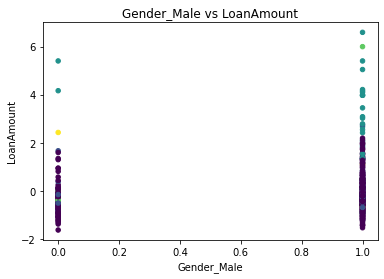

In [156]:
plt.scatter(df_train_merge1['Gender_Male'],df_train_merge1['LoanAmount'],s=20,c=y_pred_train1)
plt.title("Gender_Male vs LoanAmount")
plt.xlabel("Gender_Male")
plt.ylabel("LoanAmount")
plt.show()

# Read the Testing Data

In [157]:
df_test_i1= pd.read_csv("testing_set.csv")

In [158]:
df_test_i1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [159]:
# dropping columns having no stastical importance

In [160]:
ID = df_test_i1[['Loan_ID']]

In [161]:
df_test1 = df_test_i1.drop(['Loan_ID'],axis=1)
df_test1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Missing Values Treatment

In [162]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [163]:
df_test1.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [164]:
df_test1["Gender"].fillna(df_test1["Gender"].mode()[0],inplace=True)
df_test1["Dependents"].fillna(df_test1["Dependents"].mode()[0],inplace=True)
df_test1["Self_Employed"].fillna(df_test1["Self_Employed"].mode()[0],inplace=True)

df_test1['LoanAmount'].fillna(df_test1['LoanAmount'].median(),inplace=True)
df_test1['Loan_Amount_Term'].fillna(df_test1['Loan_Amount_Term'].median(),inplace=True)
df_test1['Credit_History'].fillna(df_test1['Credit_History'].median(),inplace=True)


In [165]:
df_test1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

In [166]:
cat = []
con = []
for i in df_test1.columns:
    if (df_test1[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [167]:
df_test_cat1 = cat
df_test_cat1=df_test1[cat]
df_test_cat1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [168]:
df_test_con1 = con
df_test_con1=df_test1[con]
df_test_con1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


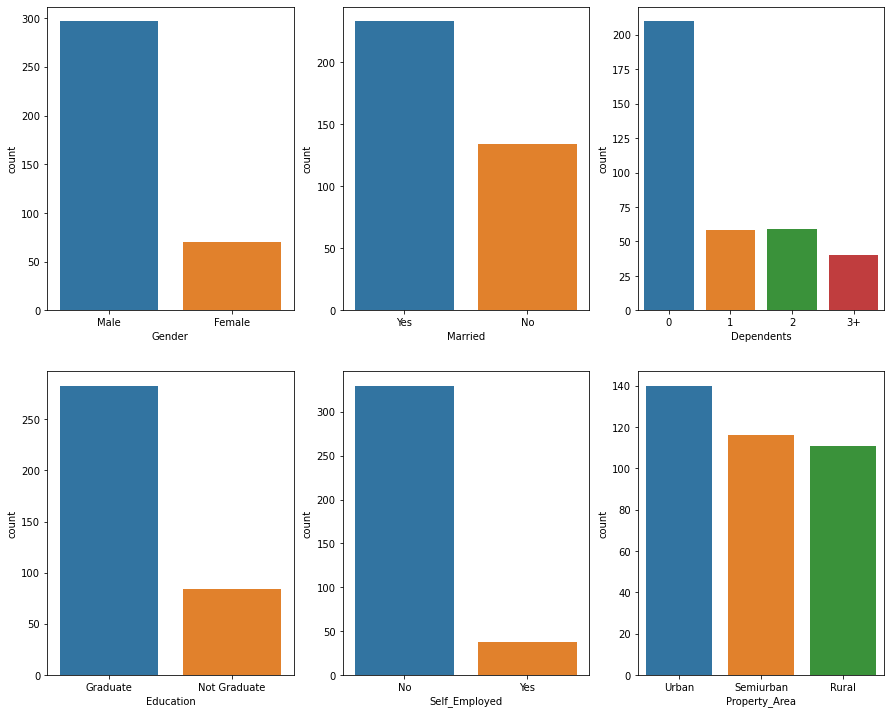

In [169]:
plt.figure(figsize=(15,19))
for x1, i in enumerate(df_test_cat1.columns):
    if df_test_cat1[i].dtypes=='object':
        plt.subplot(3,3,x1+1)
        sns.countplot(df_test_cat1[i])

# Removing Outliers

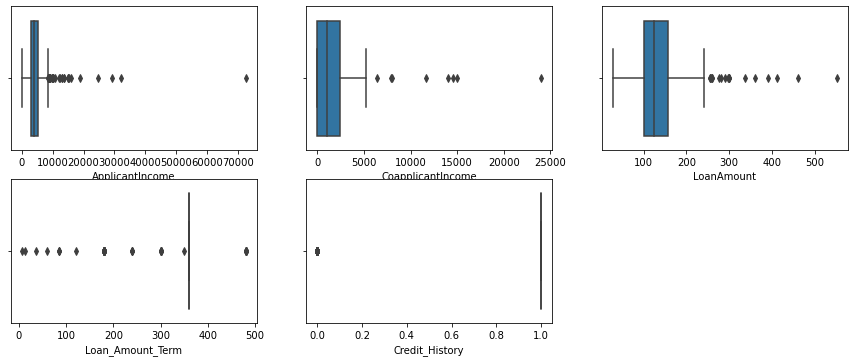

In [170]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_test_con1.columns):
    if df_test_con1[i].dtypes=='int64' or df_test_con1[i].dtypes=='float64':
        plt.subplot(3,3,x1+1)
        sns.boxplot(df_test_con1[i])

In [171]:
for i in df_test_con1.columns:
    q1 = df_test_con1[i].quantile(0.25)
    q3 = df_test_con1[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_test_con1.loc[(df_test_con1[i]>uppertail)|(df_test_con1[i]<lowertail)]
    mean_1= df_test_con1[i].mean()
    df_test_con1.loc[(df_test_con1[i]>uppertail)| (df_test_con1[i]<lowertail),i]=mean_1

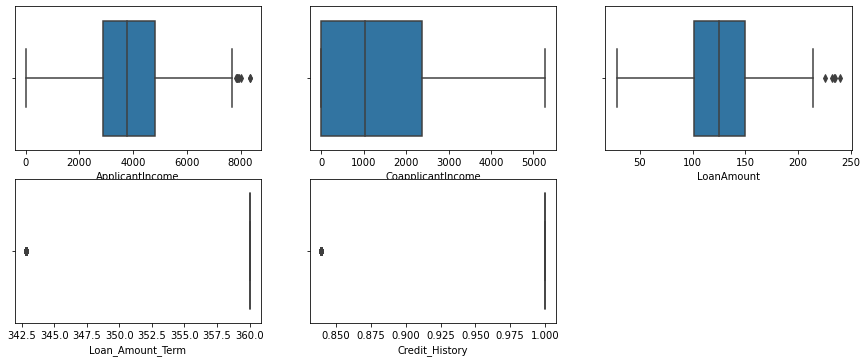

In [172]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_test_con1.columns):
    if df_test_con1[i].dtypes=='int64' or df_test_con1[i].dtypes=='float64':
        plt.subplot(3,3,x1+1)
        sns.boxplot(df_test_con1[i])

# ONE HOT ENCODING

In [173]:
df_dum_test1 = pd.get_dummies(df_test_cat1)

In [174]:
df_dum_test1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# STANDARDIZATION

In [175]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(df_test_con1)

In [176]:
x11 = pd.DataFrame(std_scaler1,columns=df_test_con1.columns)

In [177]:
x11

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.193167,-0.921930,-0.422209,0.397151,0.437674
1,-0.568828,0.119985,-0.018800,0.397151,0.437674
2,0.713350,0.328367,2.048668,0.397151,0.437674
3,-1.059308,0.846546,-0.674339,0.397151,0.437674
4,-0.435546,-0.921930,-1.229026,0.397151,0.437674
...,...,...,...,...,...
362,0.052935,0.312391,-0.346570,0.397151,0.437674
363,0.152231,-0.429452,-0.296144,0.397151,0.437674
364,-0.452872,0.462427,-0.018800,0.397151,0.437674
365,0.713350,0.740271,0.788017,0.397151,0.437674


In [178]:
# Merging One Hot Encoding and Standardization

In [179]:
df_test_merge1 = pd.concat([df_dum_test1,x11],axis=1)
df_test_merge1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1.193167,-0.921930,-0.422209,0.397151,0.437674
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,-0.568828,0.119985,-0.018800,0.397151,0.437674
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.713350,0.328367,2.048668,0.397151,0.437674
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,-1.059308,0.846546,-0.674339,0.397151,0.437674
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.435546,-0.921930,-1.229026,0.397151,0.437674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0.052935,0.312391,-0.346570,0.397151,0.437674
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0.152231,-0.429452,-0.296144,0.397151,0.437674
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.452872,0.462427,-0.018800,0.397151,0.437674
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0.713350,0.740271,0.788017,0.397151,0.437674


# FINAL_PREDICTION

In [180]:
kmeans_model = KMeans(n_clusters=5)  # n_clusters=8  >> default
y_pred_test1=kmeans_model.fit_predict(df_test_merge1)

In [181]:
y_pred_test1

array([4, 3, 4, 3, 2, 3, 2, 0, 1, 3, 2, 3, 1, 0, 2, 4, 3, 2, 4, 1, 2, 1,
       2, 2, 3, 0, 4, 4, 2, 1, 2, 4, 3, 3, 3, 0, 1, 3, 4, 3, 4, 2, 3, 4,
       2, 3, 3, 2, 4, 4, 3, 2, 3, 1, 2, 0, 2, 1, 0, 1, 3, 4, 4, 0, 4, 3,
       0, 0, 4, 0, 2, 2, 1, 3, 3, 3, 3, 2, 3, 4, 0, 4, 1, 4, 1, 1, 3, 2,
       2, 4, 3, 4, 3, 2, 0, 4, 3, 3, 2, 4, 2, 1, 2, 1, 3, 3, 0, 4, 4, 4,
       2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 4, 1, 2, 3, 2,
       3, 2, 1, 4, 4, 3, 2, 2, 0, 1, 0, 4, 1, 1, 2, 0, 4, 4, 3, 3, 4, 0,
       2, 1, 3, 1, 4, 4, 3, 0, 4, 2, 1, 0, 0, 3, 0, 2, 2, 4, 4, 1, 0, 3,
       3, 2, 4, 4, 3, 3, 4, 3, 4, 2, 4, 4, 2, 4, 1, 2, 0, 0, 3, 4, 0, 3,
       0, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 0, 4, 4, 3, 1, 1, 4, 3, 3,
       3, 3, 1, 1, 0, 2, 3, 3, 3, 0, 4, 3, 1, 4, 3, 0, 0, 4, 2, 1, 2, 0,
       2, 0, 2, 1, 4, 4, 2, 1, 1, 1, 2, 4, 3, 0, 2, 3, 3, 3, 3, 3, 2, 4,
       3, 3, 1, 3, 0, 2, 3, 3, 4, 0, 0, 3, 4, 1, 0, 4, 3, 4, 4, 2, 4, 4,
       3, 3, 4, 4, 3, 3, 2, 0, 3, 1, 4, 2, 2, 4, 4,

In [182]:
df_test_fin1 = pd.DataFrame(y_pred_test1)
df_test_fin1

,0
0,4
1,3
2,4
3,3
4,2
...,...
362,3
363,2
364,3
365,3


In [183]:
Final_out_test1 = pd.DataFrame()
Final_out_test1[["Loan_ID"]]=ID
Final_out_test1[["Cluster"]]=df_test_fin1

In [184]:
#  Comparing Loan_Id with Cluster

In [185]:
Final_out_test1

,Loan_ID,Cluster
0,LP001015,4
1,LP001022,3
2,LP001031,4
3,LP001035,3
4,LP001051,2
...,...,...
362,LP002971,3
363,LP002975,2
364,LP002980,3
365,LP002986,3


# 3.Problem Statement

In [186]:
# 3.)If customer is not eligible for the input required amount and duration:
# a.)what can be amount for the given duration.(Regression)

# Read the Data

In [187]:
DFL = pd.read_csv("testing_set.csv")


In [188]:
DFL

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [189]:
# filling NaN values
DFL['LoanAmount'].fillna(DFL['LoanAmount'].median(),inplace=True)


In [190]:
Y1 = DFL[['LoanAmount']]

In [191]:
# dropping columns having no statistical columns

In [192]:
drop_list = ['Loan_ID','LoanAmount']

In [193]:
dfal = DFL.drop(drop_list,axis=1)

In [194]:
dfal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban


In [195]:
# missing values treatment

In [196]:
dfal.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [197]:
dfal["Gender"].fillna(dfal["Gender"].mode()[0],inplace=True)
dfal["Married"].fillna(dfal["Married"].mode()[0],inplace=True)
dfal["Dependents"].fillna(dfal["Dependents"].mode()[0],inplace=True)
dfal["Education"].fillna(dfal["Education"].mode()[0],inplace=True)
dfal["Self_Employed"].fillna(dfal["Self_Employed"].mode()[0],inplace=True)


dfal['ApplicantIncome'].fillna(dfal['ApplicantIncome'].median(),inplace=True)
dfal['CoapplicantIncome'].fillna(dfal['CoapplicantIncome'].median(),inplace=True)
dfal['Loan_Amount_Term'].fillna(dfal['Loan_Amount_Term'].median(),inplace=True)
dfal['Credit_History'].fillna(dfal['Credit_History'].median(),inplace=True)


In [198]:
dfal.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [199]:
# seperation of categorical and continious columns

In [200]:
cat = []
con = []
for i in dfal.columns:
    if (dfal[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [201]:
dfal_con = con
dfal_con=dfal[con]
dfal_con

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,5720,0,360.0,1.0
1,3076,1500,360.0,1.0
2,5000,1800,360.0,1.0
3,2340,2546,360.0,1.0
4,3276,0,360.0,1.0
...,...,...,...,...
362,4009,1777,360.0,1.0
363,4158,709,360.0,1.0
364,3250,1993,360.0,1.0
365,5000,2393,360.0,1.0


In [202]:
dfal_cat = cat
dfal_cat=dfal[cat]
dfal_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


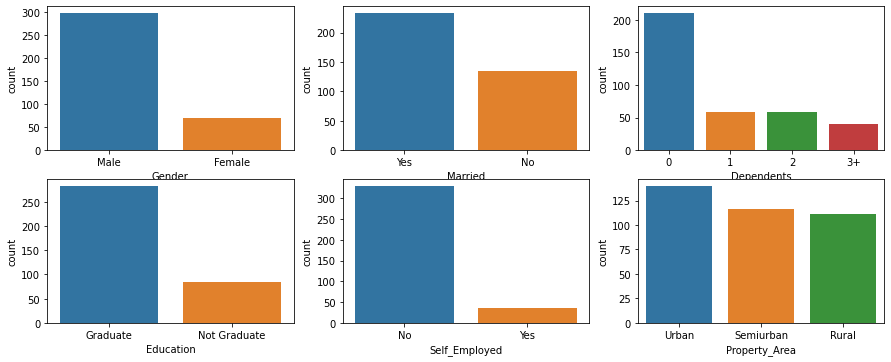

In [203]:
# visualisation of catogorical columns

plt.figure(figsize=(15,9))
for x1,i in enumerate(dfal_cat.columns):
    if dfal_cat[i].dtypes=='object':
        plt.subplot(3,3,x1+1)
        sns.countplot(dfal_cat[i])

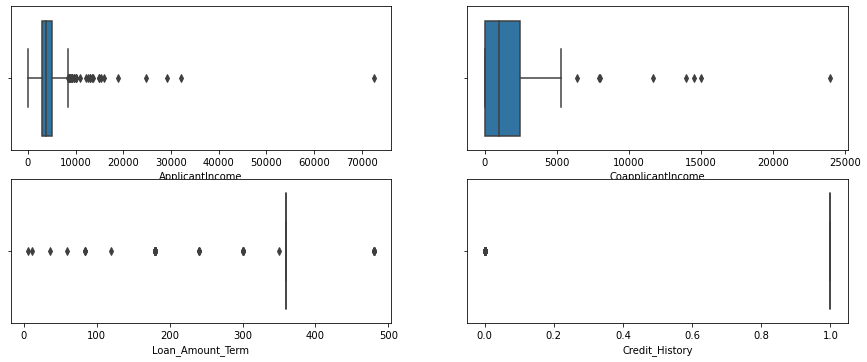

In [204]:
# visualisation of continious columns

plt.figure(figsize=(15,9))
for x1,i in enumerate(dfal_con.columns):
    if dfal_con[i].dtypes=='int64' or dfal_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(dfal_con[i])

# Removing Outliers

In [205]:
for i in dfal_con.columns:
    q1 = dfal_con[i].quantile(0.25)
    q3 = dfal_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    dfal_con.loc[(dfal_con[i]>uppertail)|(dfal_con[i]<lowertail)]
    mean_1= dfal_con[i].mean()
    dfal_con.loc[(dfal_con[i]>uppertail)| (dfal_con[i]<lowertail),i]=mean_1

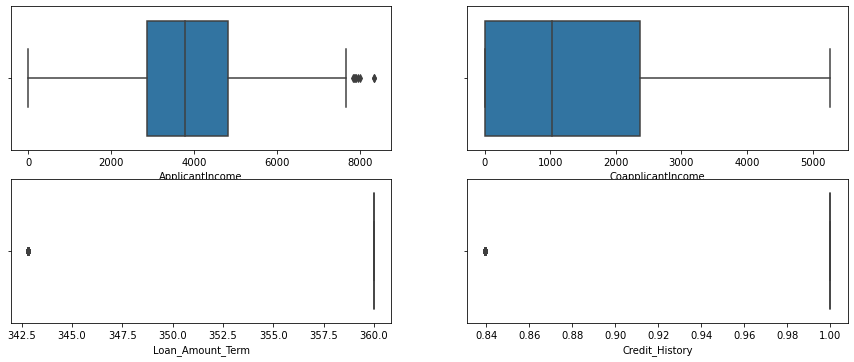

In [206]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(dfal_con.columns):
    if dfal_con[i].dtypes=='int64' or dfal_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(dfal_con[i])

# ONE HOT ENCODING 

In [207]:
df_dum_train11 = pd.get_dummies(dfal_cat)

In [208]:
df_dum_train11

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# Standardization

In [209]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(dfal_con)

In [210]:
x11 = pd.DataFrame(std_scaler1,columns=dfal_con.columns)

In [211]:
# merging one hot encoding and standardization 

In [212]:
df_train_merge11 = pd.concat([df_dum_train11,x11],axis=1)
df_train_merge11

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1.193167,-0.921930,0.397151,0.437674
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,-0.568828,0.119985,0.397151,0.437674
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0.713350,0.328367,0.397151,0.437674
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,-1.059308,0.846546,0.397151,0.437674
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.435546,-0.921930,0.397151,0.437674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0.052935,0.312391,0.397151,0.437674
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0.152231,-0.429452,0.397151,0.437674
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,-0.452872,0.462427,0.397151,0.437674
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0.713350,0.740271,0.397151,0.437674


# Splitting the dataset into training and testing 

In [213]:
xtrain,xtest,ytrain,ytest = train_test_split(df_train_merge11,Y1,test_size=0.25,random_state=35)

In [214]:
xtrain

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
158,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1.261808,0.834738,0.397151,0.437674
38,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1.268472,-0.921930,0.397151,0.437674
276,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1.712969,-0.921930,0.397151,0.437674
64,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0.373480,-0.921930,0.397151,0.437674
292,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,-0.438878,-0.921930,0.397151,0.437674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,-1.837012,0.185278,-2.517936,0.437674
249,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,-0.669457,-0.921930,-2.517936,0.437674
33,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,-0.764087,0.959073,0.397151,0.437674
271,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,-0.397560,1.798161,0.397151,0.437674


In [215]:
xtest

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
62,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0.692025,-0.921930,0.397151,0.437674
240,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,-0.057023,-0.921930,0.397151,0.437674
298,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,-0.133661,-0.921930,0.397151,0.437674
118,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,-1.444495,0.929899,0.397151,-2.284806
61,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,2.056838,-0.719104,0.397151,0.437674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,-0.435546,-0.921930,0.397151,0.437674
234,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,-1.181262,0.320032,0.397151,0.437674
246,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0.713350,0.582595,0.397151,0.437674
128,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,-0.570827,-0.921930,-2.517936,0.437674


In [216]:
ytrain

,LoanAmount
158,187.0
38,116.0
276,144.0
64,125.0
292,90.0
...,...
232,28.0
249,40.0
33,158.0
271,212.0


In [217]:
ytest

,LoanAmount
62,189.0
240,105.0
298,117.0
118,104.0
61,125.0
...,...
146,90.0
234,104.0
246,150.0
128,70.0


In [218]:
# Model Building

In [219]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [220]:
# training data evaluation
ypredtrain = lin_model.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

Mean Squared Error: 2974.1561646929467
R2-Score: 0.2585700610686482


In [221]:
# testing data evaluation
ypredtest = lin_model.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

Mean Squared Error: 3063.740874610143
R2-Score: -0.0971332618411811


In [222]:
ypredtest

array([[155.17205605],
       [ 96.46259277],
       [127.69861801],
       [125.87859124],
       [202.93162704],
       [115.87609632],
       [111.57573913],
       [157.71548698],
       [ 79.36397637],
       [141.27047615],
       [189.01833055],
       [231.45371632],
       [131.7593449 ],
       [102.59981435],
       [216.56635705],
       [195.67918171],
       [131.96849918],
       [ 86.75176498],
       [165.2061116 ],
       [199.77153918],
       [137.02938039],
       [155.46770136],
       [221.73729038],
       [169.51914983],
       [201.94762914],
       [ 93.07462991],
       [143.69228432],
       [ 82.36330251],
       [165.1224578 ],
       [127.3472265 ],
       [135.30826241],
       [123.83187552],
       [128.63323762],
       [101.14654056],
       [106.01520639],
       [181.90750463],
       [144.18900791],
       [152.61247711],
       [109.9449759 ],
       [ 55.03562705],
       [144.85826967],
       [ 83.27072992],
       [117.30636622],
       [195

In [223]:
final_loan = pd.DataFrame(ypredtest)

In [224]:
final_loan

,0
0,155.172056
1,96.462593
2,127.698618
3,125.878591
4,202.931627
...,...
87,89.483020
88,115.069187
89,204.104171
90,72.602662


In [225]:
C = final_loan.rename({0:"Loan_Amt"},axis=1)

In [226]:
C

,Loan_Amt
0,155.172056
1,96.462593
2,127.698618
3,125.878591
4,202.931627
...,...
87,89.483020
88,115.069187
89,204.104171
90,72.602662


# Que.3] b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# Read the testing data

In [227]:
DFL_test1 = pd.read_csv("testing_set.csv")

In [228]:
DFL_test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [229]:
DFL_test = DFL_test1.drop("Loan_ID",axis=1)
Y_TERM = DFL_test1[["Loan_Amount_Term"]]

In [ ]:
# Checking Missing Values 

In [230]:
DFL_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [231]:
DFL_test["Gender"].fillna(DFL_test["Gender"].mode()[0],inplace=True)
DFL_test["Dependents"].fillna(DFL_test["Dependents"].mode()[0],inplace=True)
DFL_test["Self_Employed"].fillna(DFL_test["Self_Employed"].mode()[0],inplace=True)
DFL_test["LoanAmount"].fillna(DFL_test["LoanAmount"].mode()[0],inplace=True)
DFL_test['Credit_History'].fillna(DFL_test['Credit_History'].median(),inplace=True)
DFL_test["Loan_Amount_Term"].fillna(DFL_test["Loan_Amount_Term"].mode()[0],inplace=True)


In [259]:
# Seperating Categorical and Continious columns

In [232]:
cat = []
con = []
for i in DFL_test.columns:
    if (DFL_test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [233]:
DFL_test_con = con
DFL_test_con=DFL_test[con]
DFL_test_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


In [234]:
DFL_test_cat = cat
DFL_test_cat=DFL_test[cat]
DFL_test_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


# ONE HOT ENCODING

In [235]:
df_dum_term = pd.get_dummies(DFL_test_cat)

In [236]:
df_dum_term

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# standardization

In [237]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(DFL_test_con)

In [238]:
x_term = pd.DataFrame(std_scaler1,columns=DFL_test_con.columns)

In [239]:
df_term = pd.concat([df_dum_term,x_term],axis=1)

In [240]:
df_term = pd.concat([df_dum_term,x_term],axis=1)

In [241]:
Y_term = df_term[["Loan_Amount_Term"]]
DF_1 = df_term.drop("Loan_Amount_Term",axis=1)

# Splitting the data into training and testing 

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
xtrain,xtest,ytrain,ytest=train_test_split(df_term,Y_term,test_size=0.25,random_state=21)

In [244]:
df_term.isna().sum()

Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
dtype: int64

# model Building

In [245]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

# Model Evaluation

In [246]:
# training data evaluation
ypredtrain = rf.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

Mean Squared Error: 0.001289089321586774
R2-Score: 0.9986619135281897


In [247]:
# Testing Data Evaluation
ypredtest = rf.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

Mean Squared Error: 0.0015088342009372522
R2-Score: 0.9986371569741609


# hyperparameter Tunning

In [260]:
rf_model = RandomForestRegressor(random_state=25)

hyp_grid = {'n_estimators':np.arange(1,150,5),
            'criterion':['mae','mse'],
            'max_depth':np.arange(3,20),
            'min_samples_split':np.arange(2,20),
            'min_samples_leaf':np.arange(1,15),
            'max_features':['sqrt','log2']}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp_grid,cv=5)
rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146])})

In [261]:
rscv_rf_model.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=15, max_features='log2',
                      min_samples_leaf=2, min_samples_split=19,
                      n_estimators=111, random_state=25)

In [262]:
rf_model = RandomForestRegressor(criterion='mae', max_depth=10, max_features='log2',
                      min_samples_leaf=5, min_samples_split=3, n_estimators=121,
                      random_state=15,oob_score=True)

rf_model.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mae', max_depth=10, max_features='log2',
                      min_samples_leaf=5, min_samples_split=3, n_estimators=121,
                      oob_score=True, random_state=15)

In [ ]:
#  Model Evaluation with hyperparameter Tuning

In [263]:
# Testing Data Evaluation
ypredtest = rf_model.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

Mean Squared Error: 0.5155375412674886
R2-Score: 0.5343446335997477


In [264]:
# training data evaluation
ypredtrain = rf_model.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

Mean Squared Error: 0.3258999980772759
R2-Score: 0.6617128299120352


In [271]:
# Final Prediction

In [265]:
y_term_test = rf_model.predict(xtest)

In [266]:
y_term_test

array([ 0.26474215,  0.24298354,  0.24298354,  0.24298354,  0.26602207,
       -1.51946356,  0.02411756,  0.24298354,  0.204586  ,  0.26602207,
        0.23146428,  0.21226551,  0.25066305,  0.26602207,  0.25322289,
        0.20074625,  0.28138108,  0.24298354,  0.26602207,  0.26602207,
        0.26474215,  0.19690649,  0.26602207,  0.26602207,  0.24298354,
        0.25834256,  0.26474215,  0.26602207,  0.24298354,  0.27370157,
        0.26602207,  0.24298354,  0.26602207,  0.26602207,  0.24298354,
        0.28138108,  0.22378477,  0.26602207,  0.26602207,  0.26602207,
        0.25834256,  0.26474215,  0.25834256,  0.22762453,  0.26218231,
        0.24298354,  0.19690649,  0.25834256,  0.25066305, -1.29215012,
       -1.22764225, -1.06944439,  0.23530403,  0.19690649,  0.26602207,
        0.26602207,  0.26602207,  0.24298354,  0.23530403,  0.21226551,
        0.24298354,  0.19690649,  0.26602207,  0.25834256,  0.24298354,
        0.26602207,  0.26602207,  0.23914379,  0.2468233 ,  0.26

In [ ]:
# Final Data Frame

In [267]:
L_TERM11 = pd.DataFrame(y_term_test)

In [268]:
L_TERM11

,0
0,0.264742
1,0.242984
2,0.242984
3,0.242984
4,0.266022
...,...
87,0.163117
88,-1.322100
89,0.269862
90,0.266022


In [272]:
# Loan_Amt_Term

In [273]:
FINAL_LOAN_TERM = L_TERM11.rename({0:"LOAN_AMT_TERM1"},axis=1)

In [274]:
FINAL_LOAN_TERM

,LOAN_AMT_TERM1
0,0.264742
1,0.242984
2,0.242984
3,0.242984
4,0.266022
...,...
87,0.163117
88,-1.322100
89,0.269862
90,0.266022
